## Preliminaries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import __init__ as a
import pandas as pd
import math
a.mpl.rcParams['font.size'] = 12

/home/colemanliyah/pyrfume/notebooks/enantiomerlist


### This is important

In [3]:
#Demo
a.test_rdkit_mordred() # Should show features for two molecules below.  

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 2/2 [00:00<00:00,  2.80it/s]
/home/colemanliyah/pyrfume/notebooks/enantiomerlist/__init__.py:99: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  mordred = pd.DataFrame(df.as_matrix(), index=smiles, columns=df.columns)


There are 2 molecules and 1826 features


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H]2[C@@H]1c3c(O)c(OC)c(O)cc3C(=O)O2,17.8202,15.152,0,0,29.22,2.56069,5.12137,29.22,1.27043,4.077,...,10.4037,58.1999,328.079,8.41229,1030,47,126,157,9.47222,5.11111
CC(=O)NCCC1=CNc2c1cc(OC)cc2,12.8658,11.2443,0,0,21.6032,2.42108,4.72099,21.6032,1.27077,3.74904,...,9.53727,63.2639,232.121,7.03398,561,22,84,96,5.80556,3.88889


In [4]:
#Demo
plus_carvone = 'CC1=CC[C@@H](CC1=O)C(=C)C'
minus_carvone = 'CC1=CC[C@H](CC1=O)C(=C)C'
features = a.smiles_to_mordred([plus_carvone,minus_carvone])
plus_features = features.values[0,:]
minus_features = features.values[1,:]
print("%.1f percent of Mordred features are identical between (+)-carvone and (-)-carvone." % \

      (100.0*(plus_features==minus_features).mean()))

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 2/2 [00:00<00:00,  6.21it/s]


There are 2 molecules and 1826 features
79.7 percent of Mordred features are identical between (+)-carvone and (-)-carvone.


In [5]:
#This section loads in the data and groups each pair of enantiomers by making them have the same number associated with column "N"
#WE also set the Normalized Detection Thresholds to be of the same type as a way of trying to avoid type errors later on
coleman_smiles = a.load_other_smiles(coleman=True)
coleman_data = a.load_data("coleman")#.iloc[1:]
import numpy as np
coleman_data['N'] = np.arange(0, coleman_data.shape[0]/2, 0.5).astype(int)
coleman_data['Normalized Detection Threshold'] = coleman_data['Normalized Detection Threshold'].astype('float')
#match sutto code above to lines 261 in the init file

Loaded 454 molecules


In [6]:
coleman_data.head()

,Molecule Name,Pubchem ID #,Note,SMILES String,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N
0,(R)-(-)-gamma-ionone,11389922,NaN,CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0
1,(S)-(+)-gamma-ionone,11194862,NaN,CC(=O)/C=C/[C@@H]1C(=C)CCCC1(C)C,7.00E-02,ppb water,0.07,"Linear, very pleasant, floral, green, woody od...",Rows 101-121 are from here: https://github.com...,0
2,(4R)-(-)-carvone,439570,NaN,CC1=CC[C@H](CC1=O)C(=C)C,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1
3,(4S)-(+)-carvone,16724,NaN,CC1=CC[C@@H](CC1=O)C(=C)C,1.30E+02,ppb,130.00,"caraway, fresh herbal",Rows 194-223 are from here: https://github.com...,1
4,"(4R,7R)-(+)-galaxolide",14177988,NaN,C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2


In [7]:
#This section takes each pair of enantiomers and computes the ratio of the Normalized Detection Thresholds between the two
def log_abs(x):
    return np.abs(np.log10(x['Normalized Detection Threshold'].values[1]/x['Normalized Detection Threshold'].values[0]))
half_coleman_dt = coleman_data.groupby('N').apply(log_abs)

In [14]:
#This section creates a new data frame with just one odorant of each enantiomeric pair with the column of absolute log values
halfColeman_data = coleman_data.iloc[::2]
halfColeman_data['log_abs'] = half_coleman_dt.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
half_coleman_dt.isnull().sum(), halfColeman_data['log_abs'].isnull().sum()

(15, 15)

In [16]:
halfColeman_data.head()

,Molecule Name,Pubchem ID #,Note,SMILES String,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N,log_abs
0,(R)-(-)-gamma-ionone,11389922,NaN,CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0,2.196295
2,(4R)-(-)-carvone,439570,NaN,CC1=CC[C@H](CC1=O)C(=C)C,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1,1.812913
4,"(4R,7R)-(+)-galaxolide",14177988,NaN,C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2,2.643453
6,"(4R,4aS,6R)-(+) nootkatone",1268142,NaN,C[C@@H]1CC(=O)C=C2[C@]1(C[C@@H](CC2)C(=C)C)C,1.50E+01,ppm,15000.00,grapefruit odor,Rows 370-407 are from here: https://github.com...,3,3.643453
8,"(2S,4R)-(+) cis-2-methyl-4-propyl-1,3-oxathiane",6931728,NaN,CCC[C@@H]1CCO[C@@H](S1)C,2.00E+00,ppb,2.00,"ctypical sulfurous, with a rubbery onion note;...",Rows 424-435 are from here: https://github.com...,4,0.301030


In [17]:
#halfColeman_data['SMILES String'].str.contains('nan').sum()
#This section gets rid of all the invalid SMILES Strings, specifically the duplicates because we don't want to count their perceptual features twice
#and the "nan" values 
halfColeman_data = halfColeman_data.drop_duplicates(subset=['SMILES String'])
halfColeman_data = halfColeman_data[~halfColeman_data['SMILES String'].str.contains('NaN', na=True)]
halfColeman_data = halfColeman_data[~halfColeman_data['SMILES String'].str.contains('nan', na=True)]
halfColeman_data

,Molecule Name,Pubchem ID #,Note,SMILES String,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N,log_abs
0,(R)-(-)-gamma-ionone,11389922,NaN,CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0,2.196295
2,(4R)-(-)-carvone,439570,NaN,CC1=CC[C@H](CC1=O)C(=C)C,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1,1.812913
4,"(4R,7R)-(+)-galaxolide",14177988,NaN,C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2,2.643453
6,"(4R,4aS,6R)-(+) nootkatone",1268142,NaN,C[C@@H]1CC(=O)C=C2[C@]1(C[C@@H](CC2)C(=C)C)C,1.50E+01,ppm,15000.00,grapefruit odor,Rows 370-407 are from here: https://github.com...,3,3.643453
8,"(2S,4R)-(+) cis-2-methyl-4-propyl-1,3-oxathiane",6931728,NaN,CCC[C@@H]1CCO[C@@H](S1)C,2.00E+00,ppb,2.00,"ctypical sulfurous, with a rubbery onion note;...",Rows 424-435 are from here: https://github.com...,4,0.301030
...,...,...,...,...,...,...,...,...,...,...,...
434,"(+)-8-Dehydro-11,12-dihydronootkatone",71587038,http://www.thegoodscentscompany.com/data/rw103...,C[C@@H]1CC(=O)C[C@H]2[C@]1(C[C@@H](CC2)C(=C)C)C,5000-10000,NaN,5000000.00,"On an odor rating scale: fresh, green, sour, d...",NaN,217,0.903090
438,(+)-androstenone,6852393,NaN,C[C@]12CC[C@H]3[C@H]([C@@H]1CC=C2)CC[C@@H]4[C@...,1.80E-01,ppb,0.18,strong urine odor,NaN,219,NaN
442,"(1\\\'R,E)-(+)-2-Methyl-4-(2\\\',2\\\',3\\\'-t...",6438196,http://www.thegoodscentscompany.com/data/rw100...,CC/C(=C\\CC1CC=C(C1(C)C)C)/CO,5.40E+01,ppb,54.00,fresh and strong sandalwood oil odor associate...,NaN,221,0.894972
446,"(-)-(2R)-2-methyl-4-[(1R)-2,2,3-trimethylcyclo...",1747970,NaN,CC1=CC[C@H](C1(C)C)CC[C@@H](C)CO,1.87E+01,ppb,18.70,peculiar sandalwood\\\'s strongly excellent smell,NaN,223,0.948266


In [18]:
#These two assert statements are to ensure that we only have unqiue smiles strings and that no smiles strings are nan values
assert halfColeman_data['SMILES String'].shape == halfColeman_data['SMILES String'].unique().shape, "Number of SMILES strings should equal number of unique SMILES strings at this stage"

In [19]:
assert sum(halfColeman_data['SMILES String']=='nan') == 0, "There should be no NaN SMILES strings at this point"

In [20]:
#This section extracts the mordred features from the SMILES strings
mordred_all = a.smiles_to_mordred(halfColeman_data['SMILES String'].values)

Convering SMILES string to Mol format...
Computing 3D coordinates...
Removing CC(=C)C1CC[C@]2([C@H](C1)O2)C due to failed embedding
Removing CC[C@@H](C)[C@@H](C(=O)O[C@@H]([C@@H](C)CC)C(=O)O[C@@H]([C@@H](C)CC)C(=O)O[C@@H]([C@@H](C)CC)C(=O)OC[C@@H]([C@@H]([C@@H]([C@@H](CO)O)O)O)O)O due to failed embedding
Removing CC[C@@H](C)[C@H](C(=O)O[C@H]1[C@@H](C(C(=C)[C@@]2([C@@]1([C@H](CC2=O)C3=COC=C3)C)O)[C@@]4([C@H](CC(=O)O[C@]([C@@H]4CC(=O)OC)(C)COC(=O)C)OC(=O)C)C)OC=O)O due to failed embedding
Computing Mordred features...


100%|██████████| 184/184 [00:07<00:00, 25.43it/s]


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
There are 184 molecules and 1826 features


In [21]:
halfColeman_data.shape

(187, 11)

In [22]:
mordred_all.shape

(184, 1826)

In [23]:
#Some molecules are lost here just by the fact that mordred removed some that failed to embedding

In [24]:
#This section combines that half data frame with the mordred features and sets the indexing to be by smiles strings
all_data = halfColeman_data.set_index('SMILES String').join(mordred_all, how='inner')

In [25]:
all_data

,Molecule Name,Pubchem ID #,Note,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N,log_abs,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,(R)-(-)-gamma-ionone,11389922,NaN,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0,2.196295,...,9.50144,45.5963,192.151,5.65151,301,19,68,76,6.64583,3.06944
CC1=CC[C@H](CC1=O)C(=C)C,(4R)-(-)-carvone,439570,NaN,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1,1.812913,...,9.07142,40.9913,150.104,6.00418,152,14,52,58,5.19444,2.47222
C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,"(4R,7R)-(+)-galaxolide",14177988,NaN,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2,2.643453,...,10.3832,68.8592,258.198,5.73774,595,39,112,141,8.04167,3.83333
C[C@@H]1CC(=O)C=C2[C@]1(C[C@@H](CC2)C(=C)C)C,"(4R,4aS,6R)-(+) nootkatone",1268142,NaN,1.50E+01,ppm,15000.00,grapefruit odor,Rows 370-407 are from here: https://github.com...,3,3.643453,...,9.97883,49.2196,218.167,5.74124,397,28,86,103,6.86806,3.40278
CCC[C@@H]1CCO[C@@H](S1)C,"(2S,4R)-(+) cis-2-methyl-4-propyl-1,3-oxathiane",6931728,NaN,2.00E+00,ppb,2.00,"ctypical sulfurous, with a rubbery onion note;...",Rows 424-435 are from here: https://github.com...,4,0.301030,...,8.66751,38.7042,160.092,6.15739,124,10,44,47,3.72222,2.41667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C[C@@H]1CC(=O)C[C@H]2[C@]1(C[C@@H](CC2)C(=C)C)C,"(+)-8-Dehydro-11,12-dihydronootkatone",71587038,http://www.thegoodscentscompany.com/data/rw103...,5000-10000,NaN,5000000.00,"On an odor rating scale: fresh, green, sour, d...",NaN,217,0.903090,...,9.97883,49.2196,220.183,5.50457,397,28,86,103,6.86806,3.40278
C[C@]12CC[C@H]3[C@H]([C@@H]1CC=C2)CC[C@@H]4[C@@]3(CCC(=O)C4)C,(+)-androstenone,6852393,NaN,1.80E-01,ppb,0.18,strong urine odor,NaN,219,NaN,...,10.4599,69.1263,272.214,5.67113,699,40,120,151,6.18056,4.09722
CC/C(=C\\CC1CC=C(C1(C)C)C)/CO,"(1\\\'R,E)-(+)-2-Methyl-4-(2\\\',2\\\',3\\\'-t...",6438196,http://www.thegoodscentscompany.com/data/rw100...,5.40E+01,ppb,54.00,fresh and strong sandalwood oil odor associate...,NaN,221,0.894972,...,9.50084,61.0253,208.183,5.33802,387,21,72,83,6.89583,3.5
CC1=CC[C@H](C1(C)C)CC[C@@H](C)CO,"(-)-(2R)-2-methyl-4-[(1R)-2,2,3-trimethylcyclo...",1747970,NaN,1.87E+01,ppb,18.70,peculiar sandalwood\\\'s strongly excellent smell,NaN,223,0.948266,...,9.45399,59.7573,196.183,5.1627,317,19,68,78,6.64583,3.16667


In [26]:
check = [x for x in all_data["log_abs"] if x == 0]
print(check)
print(183-len(check))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
165


In [27]:
#This linegets rid of the mordred feature columns where the log abs values are 0 or greater than 1e100
#good_data = all_data[(all_data['log_abs']>=0) & (all_data['log_abs']<=1e100)]
#halfColeman_data['log_abs'].isnull().sum()
good_data = all_data.loc[all_data["log_abs"].notnull()]

In [28]:
good_data

,Molecule Name,Pubchem ID #,Note,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N,log_abs,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,(R)-(-)-gamma-ionone,11389922,NaN,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0,2.196295,...,9.50144,45.5963,192.151,5.65151,301,19,68,76,6.64583,3.06944
CC1=CC[C@H](CC1=O)C(=C)C,(4R)-(-)-carvone,439570,NaN,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1,1.812913,...,9.07142,40.9913,150.104,6.00418,152,14,52,58,5.19444,2.47222
C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,"(4R,7R)-(+)-galaxolide",14177988,NaN,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2,2.643453,...,10.3832,68.8592,258.198,5.73774,595,39,112,141,8.04167,3.83333
C[C@@H]1CC(=O)C=C2[C@]1(C[C@@H](CC2)C(=C)C)C,"(4R,4aS,6R)-(+) nootkatone",1268142,NaN,1.50E+01,ppm,15000.00,grapefruit odor,Rows 370-407 are from here: https://github.com...,3,3.643453,...,9.97883,49.2196,218.167,5.74124,397,28,86,103,6.86806,3.40278
CCC[C@@H]1CCO[C@@H](S1)C,"(2S,4R)-(+) cis-2-methyl-4-propyl-1,3-oxathiane",6931728,NaN,2.00E+00,ppb,2.00,"ctypical sulfurous, with a rubbery onion note;...",Rows 424-435 are from here: https://github.com...,4,0.301030,...,8.66751,38.7042,160.092,6.15739,124,10,44,47,3.72222,2.41667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C[C@@H]1CC(=O)C=C2[C@]1(CC(=C(C)C)CC2)C,"(4R,4aS)-(+)-alpha-vetivone",442405,NaN,600-1000,NaN,600000.00,some grapefruit character in combination with ...,NaN,216,1.000000,...,9.97883,49.2196,218.167,5.74124,397,28,86,103,6.86806,3.40278
C[C@@H]1CC(=O)C[C@H]2[C@]1(C[C@@H](CC2)C(=C)C)C,"(+)-8-Dehydro-11,12-dihydronootkatone",71587038,http://www.thegoodscentscompany.com/data/rw103...,5000-10000,NaN,5000000.00,"On an odor rating scale: fresh, green, sour, d...",NaN,217,0.903090,...,9.97883,49.2196,220.183,5.50457,397,28,86,103,6.86806,3.40278
CC/C(=C\\CC1CC=C(C1(C)C)C)/CO,"(1\\\'R,E)-(+)-2-Methyl-4-(2\\\',2\\\',3\\\'-t...",6438196,http://www.thegoodscentscompany.com/data/rw100...,5.40E+01,ppb,54.00,fresh and strong sandalwood oil odor associate...,NaN,221,0.894972,...,9.50084,61.0253,208.183,5.33802,387,21,72,83,6.89583,3.5
CC1=CC[C@H](C1(C)C)CC[C@@H](C)CO,"(-)-(2R)-2-methyl-4-[(1R)-2,2,3-trimethylcyclo...",1747970,NaN,1.87E+01,ppb,18.70,peculiar sandalwood\\\'s strongly excellent smell,NaN,223,0.948266,...,9.45399,59.7573,196.183,5.1627,317,19,68,78,6.64583,3.16667


In [29]:
#Why are these null if we took out the ones that are zero
good_data["log_abs"].isnull().sum()

0

In [30]:
#This line checks to make sure that there are no more null values in the whole dataframe
#If there are nulls, this will be dealt with in the following cells
good_data[list(mordred_all)].notnull().sum().sum()

315898

In [31]:
#The first line is to check that the number of nulls in the mordred_all columns is zero
#The second line only takes the columns where the condition in the first line is true
finite_mordred = good_data[list(mordred_all)].astype(float).isnull().sum()==0
finite_mordred = finite_mordred[finite_mordred].index

0.1922166203488579 0.02851371995887288


(array([ 2., 11., 14., 16.,  9., 15.,  9., 11.,  8.,  5.]),
 array([-0.39325051, -0.27468049, -0.15611047, -0.03754046,  0.08102956,
         0.19959958,  0.31816959,  0.43673961,  0.55530962,  0.67387964,
         0.79244966]),
 <a list of 10 Patch objects>)

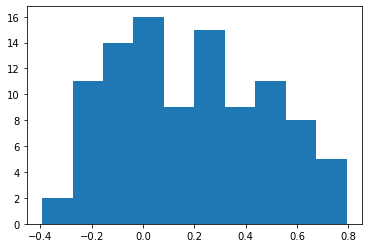

In [32]:
#
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import Lasso

Y = good_data["log_abs"].values
X = good_data[finite_mordred].astype(float).values

rs = np.zeros(100)
ss = ShuffleSplit(n_splits=len(rs))

for i, (train, test) in enumerate(ss.split(X)):
    rfr = RandomForestRegressor(n_estimators=100, max_features=25)
    rfr.fit(X[train, :], Y[train])
    predicted = rfr.predict(X[test, :])
    rs[i] = np.corrcoef(predicted, Y[test])[0, 1]
print(np.mean(rs), np.std(rs)/np.sqrt(len(rs)))
plt.hist(rs)

In [33]:
print(clf.score(X_test,y_test))
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classificantion_report

confusion_mat = confusion_matrix(y_test, y_predict)
print(confusion_mat)
print("---------------")
plt.imshow(confusion_mat)
plt.title("Confusion matrix")
ticks = np.arrang(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
plt.show()

NameError: name 'clf' is not defined